In [1]:
import pandas as pd

exames_dataset = pd.read_csv("Pos MLs03b exames.csv")
exames_dataset

SEED = 123

In [2]:
X = exames_dataset.drop(columns=["id", "diagnostico"])
y = exames_dataset.diagnostico
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier


In [3]:
def classificador(X):
    random.seed(SEED)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
    print(X_train.shape)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100}%")

classificador(X)

(398, 33)
Accuracy: 95.90643274853801%


# Visualização dos dados

In [4]:
#unpivot
exames_dataset_2 = exames_dataset.drop(columns=["id"])
exames_unpivot = pd.melt(exames_dataset_2, id_vars="diagnostico", var_name="exames", value_name="valores")
exames_unpivot

,diagnostico,exames,valores
0,M,exame_1,17.990000
1,M,exame_1,20.570000
2,M,exame_1,19.690000
3,M,exame_1,11.420000
4,M,exame_1,20.290000
...,...,...,...
18772,M,exame_33,0.158771
18773,M,exame_33,NaN
18774,M,exame_33,NaN
18775,M,exame_33,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

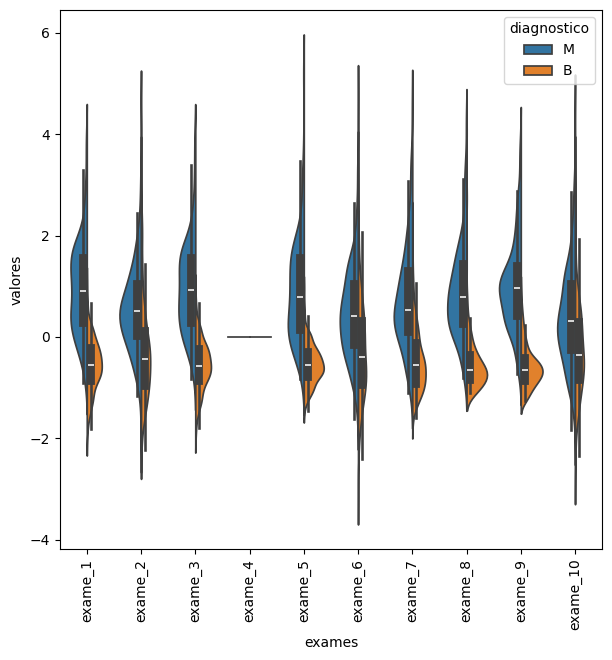

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_standarized = pd.DataFrame(scaler.transform(X), columns=X.keys())

dados = pd.concat([y, X_standarized.iloc[:,0:10]], axis=1)
exames_unpivot = pd.melt(dados, id_vars="diagnostico", var_name="exames", value_name="valores")
plt.figure(figsize=(7,7))
sns.violinplot(x="exames", y="valores", data = exames_unpivot, hue="diagnostico", split=True)
plt.xticks(rotation = 90)


In [6]:
print(X.exame_4)

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'exame_11'),
  Text(1, 0, 'exame_12'),
  Text(2, 0, 'exame_13'),
  Text(3, 0, 'exame_14'),
  Text(4, 0, 'exame_15'),
  Text(5, 0, 'exame_16'),
  Text(6, 0, 'exame_17'),
  Text(7, 0, 'exame_18'),
  Text(8, 0, 'exame_19'),
  Text(9, 0, 'exame_20'),
  Text(10, 0, 'exame_21')])

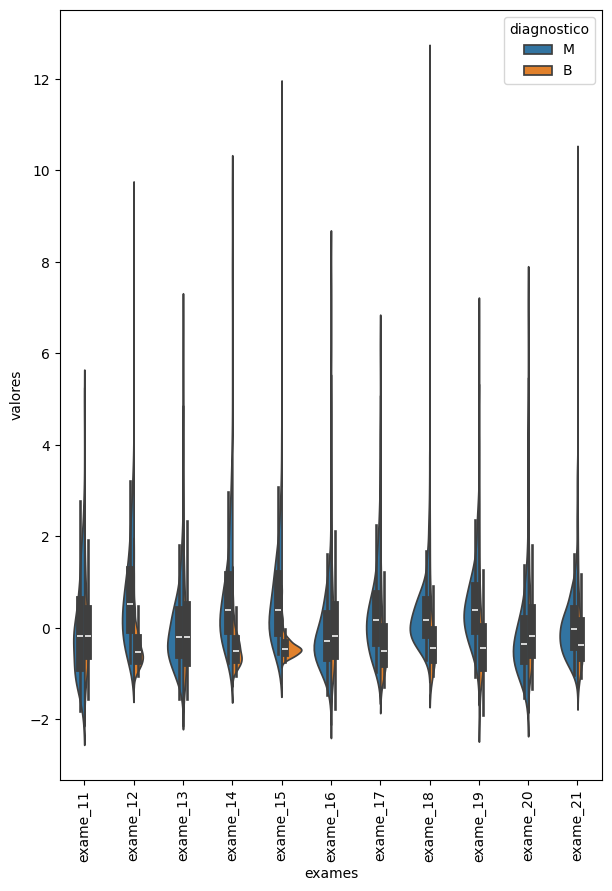

In [7]:
dados = pd.concat([y, X_standarized.iloc[:,10:21]], axis=1)
exames_unpivot = pd.melt(dados, id_vars="diagnostico", var_name="exames", value_name="valores")
plt.figure(figsize=(7,10))
sns.violinplot(x="exames", y="valores", data = exames_unpivot, hue="diagnostico", split=True)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'exame_22'),
  Text(1, 0, 'exame_23'),
  Text(2, 0, 'exame_24'),
  Text(3, 0, 'exame_25'),
  Text(4, 0, 'exame_26'),
  Text(5, 0, 'exame_27'),
  Text(6, 0, 'exame_28'),
  Text(7, 0, 'exame_29'),
  Text(8, 0, 'exame_30'),
  Text(9, 0, 'exame_31'),
  Text(10, 0, 'exame_32'),
  Text(11, 0, 'exame_33')])

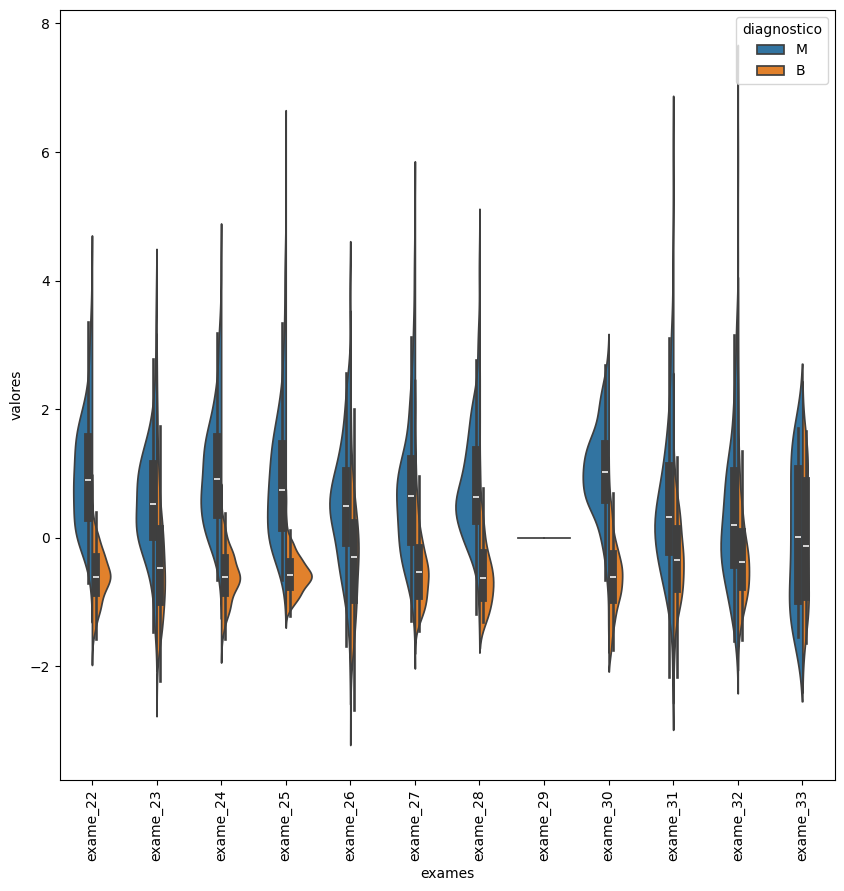

In [8]:
dados = pd.concat([y, X_standarized.iloc[:,21:33]], axis=1)
exames_unpivot = pd.melt(dados, id_vars="diagnostico", var_name="exames", value_name="valores")
plt.figure(figsize=(10,10))
sns.violinplot(x="exames", y="valores", data = exames_unpivot, hue="diagnostico", split=True)
plt.xticks(rotation = 90)

In [9]:
print(X.exame_29)

0      0.786
1      0.786
2      0.786
3      0.786
4      0.786
       ...  
564    0.786
565    0.786
566    0.786
567    0.786
568    0.786
Name: exame_29, Length: 569, dtype: float64


In [10]:
X_droped_1 = X.drop(columns=["exame_4", "exame_29"])
classificador(X_droped_1)

(398, 31)
Accuracy: 95.90643274853801%


<Axes: >

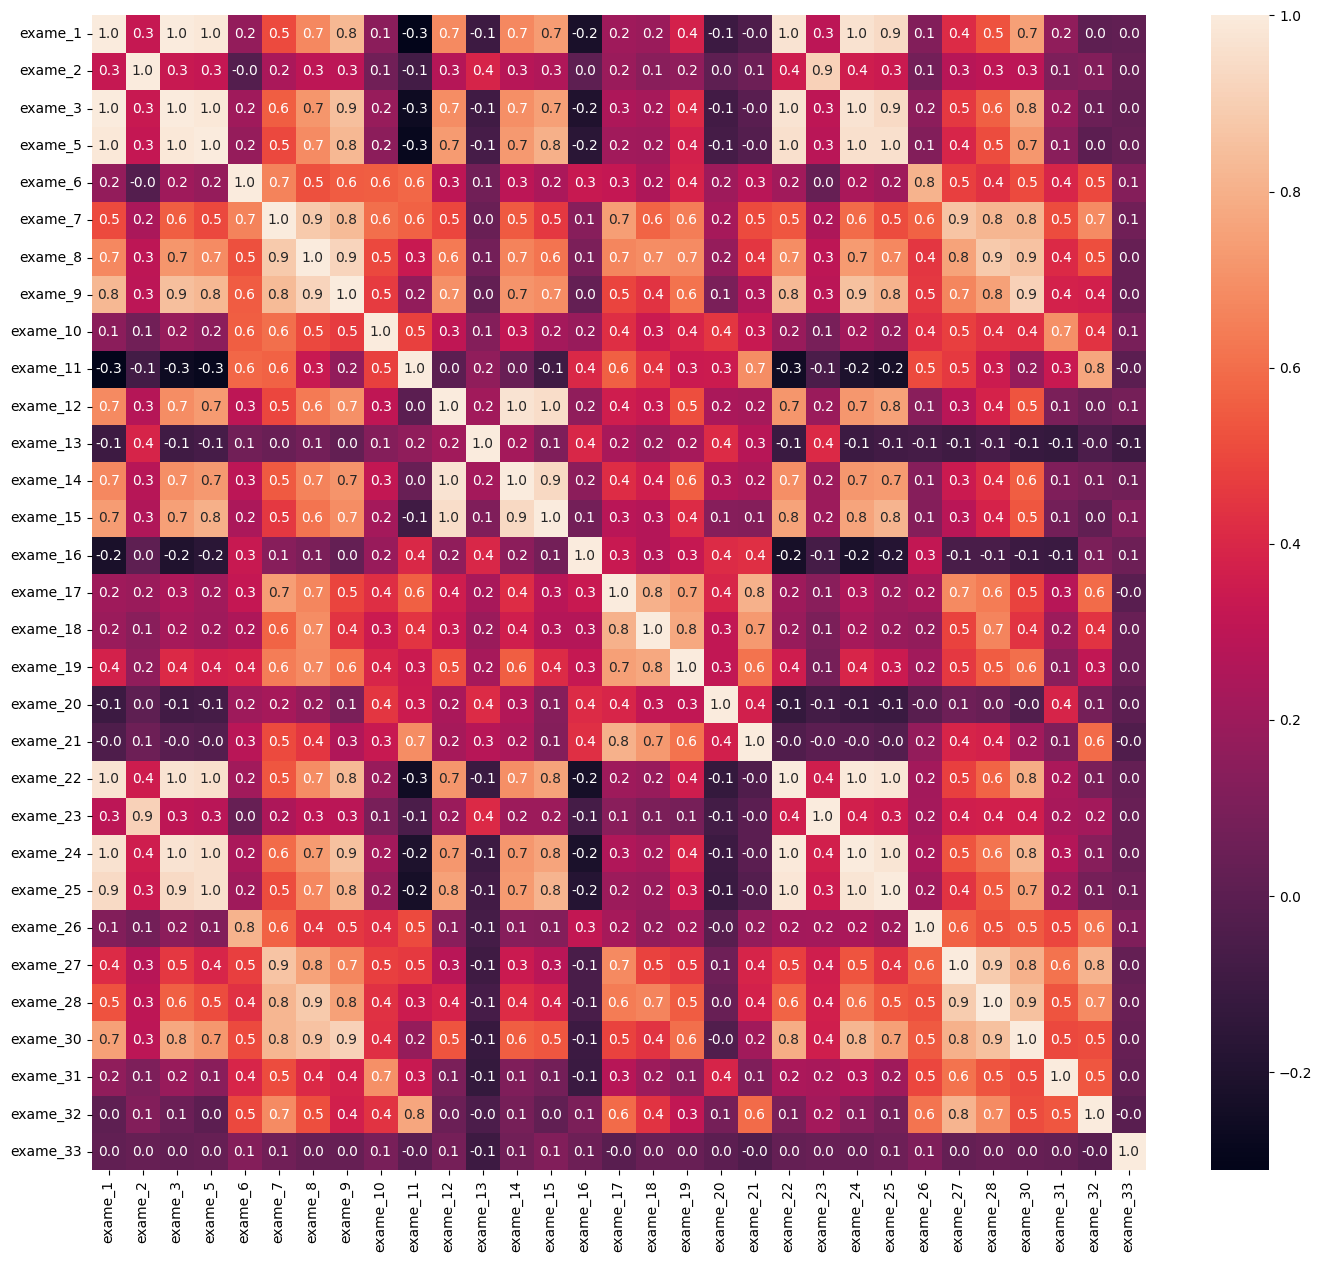

In [11]:
import seaborn as sns
matriz_correlacao = X_droped_1.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [12]:
matriz_correlacao_ = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32,exame_33
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
matriz_correlacao_ = matriz_correlacao_.sum()
correlacionados = matriz_correlacao_[matriz_correlacao_ > 1]
correlacionados

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [14]:

X_droped_2 = X_droped_1.drop(columns=["exame_3", "exame_24"])
classificador(X_droped_2)

(398, 29)
Accuracy: 97.6608187134503%


In [15]:
X_droped_2.isnull().sum()

exame_1       0
exame_2       0
exame_5       0
exame_6       0
exame_7       0
exame_8       0
exame_9       0
exame_10      0
exame_11      0
exame_12      0
exame_13      0
exame_14      0
exame_15      0
exame_16      0
exame_17      0
exame_18      0
exame_19      0
exame_20      0
exame_21      0
exame_22      0
exame_23      0
exame_25      0
exame_26      0
exame_27      0
exame_28      0
exame_30      0
exame_31      0
exame_32      0
exame_33    419
dtype: int64

In [16]:
X_droped_3 = X_droped_2.drop(columns=["exame_33"])
classificador(X_droped_3)

(398, 28)


Accuracy: 96.49122807017544%


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

dataset_kbest = SelectKBest(chi2, k=5)

X_no_nan = X.drop(columns=["exame_33"])

random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X_no_nan, y, test_size = 0.3, stratify = y)

dataset_kbest.fit(X_train, y_train)
X_train_kbest = dataset_kbest.transform(X_train)
X_test_kbest = dataset_kbest.transform(X_test)

X_train_kbest.shape


(398, 5)

In [18]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_kbest, y_train)
y_pred = model.predict(X_test_kbest)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100}%")

Accuracy: 94.73684210526315%


[[104   3]
 [  6  58]]


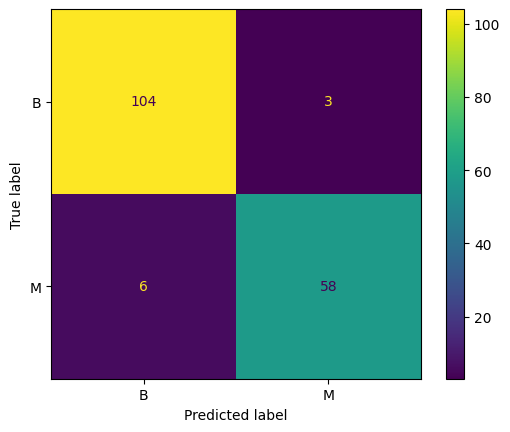

In [19]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=["B", "M"])
cmd.plot()

In [20]:
from sklearn.feature_selection import RFE

random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

rfe = RFE(estimator=model, n_features_to_select=5, step = 50)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)

y_pred = model.predict(X_test_rfe)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100}%")

Accuracy: 94.15204678362574%


In [21]:
from sklearn.feature_selection import RFECV

random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

rfe_cv = RFECV(estimator=model, step = 50, cv=10, scoring="accuracy")
rfe_cv.fit(X_train, y_train)

X_train_rfe = rfe_cv.transform(X_train)
X_test_rfe = rfe_cv.transform(X_test)

model.fit(X_train_rfe, y_train)

y_pred = model.predict(X_test_rfe)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100}%")

Accuracy: 94.73684210526315%


(569, 5)


<Axes: >

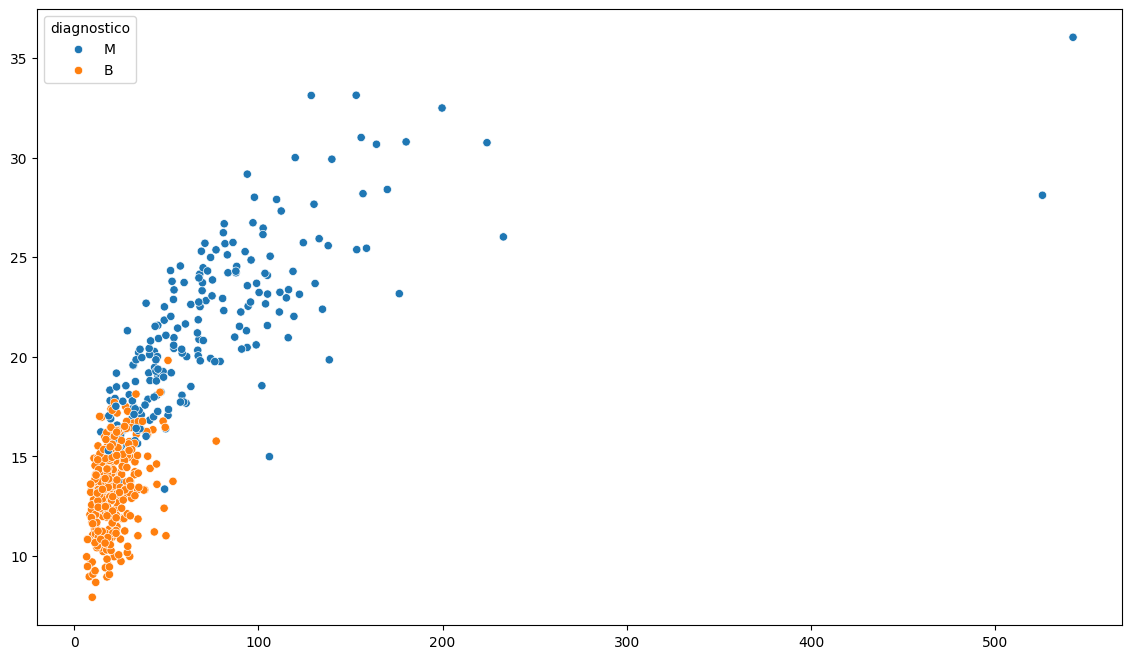

In [22]:
X_rfe = rfe.transform(X)
print(X_rfe.shape)
plt.figure(figsize=(14,8))
sns.scatterplot(x = X_rfe[:,0], y = X_rfe[:,1], hue= y)

<Axes: >

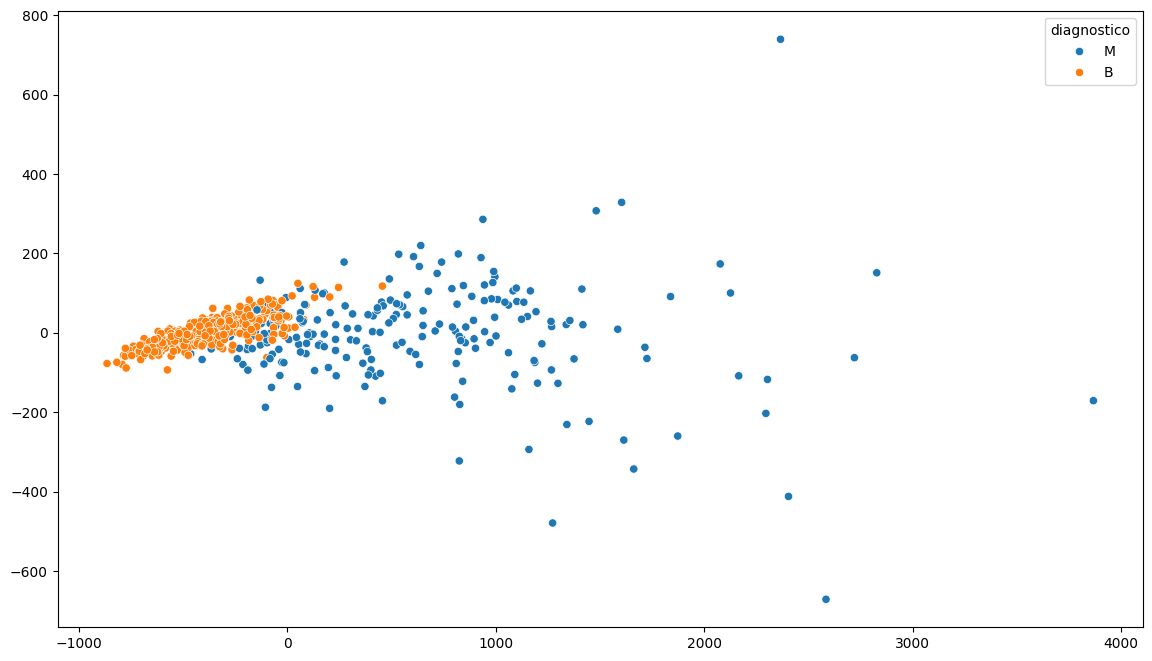

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_no_nan)
X_pca

plt.figure(figsize=(14,8))
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue= y)


In [24]:
classificador(X_pca)

(398, 2)
Accuracy: 95.90643274853801%


<Axes: >

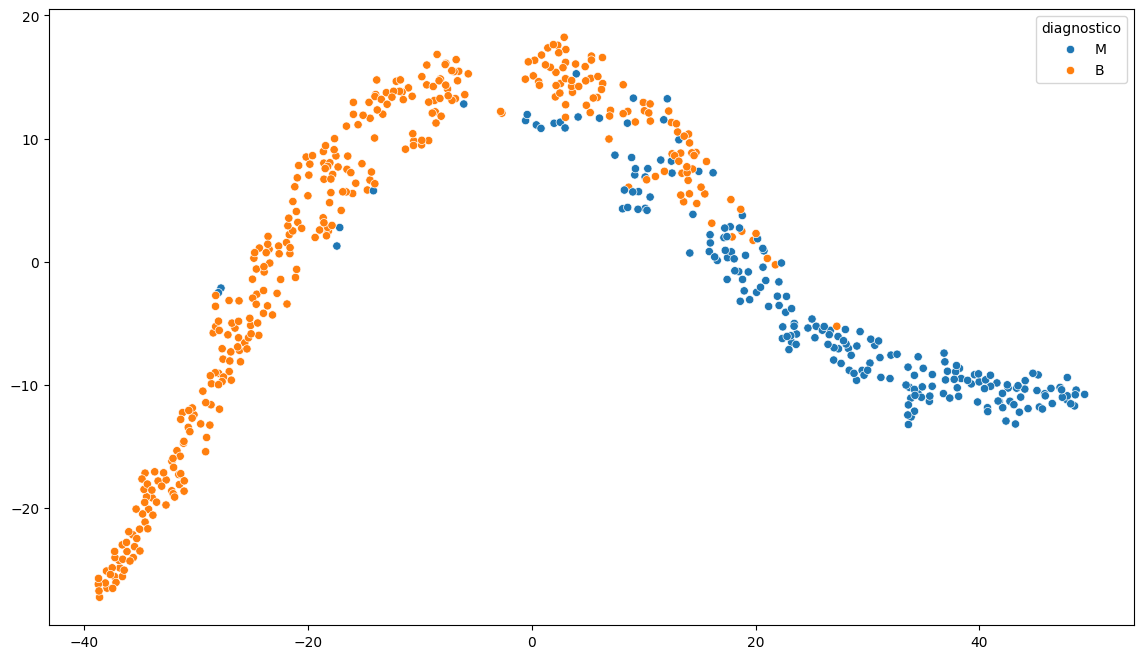

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_no_nan)

plt.figure(figsize=(14,8))
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue= y)

In [26]:
classificador(X_tsne)

(398, 2)


Accuracy: 92.98245614035088%
